In [1]:
using JuMP
using Ipopt

In [2]:
model = Model(with_optimizer(Ipopt.Optimizer))

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [3]:
@variable(model, 0 <= x <= 2)
@variable(model, 0 <= y <= 30)

y

In [4]:
model

A JuMP Model
Feasibility problem with:
Variables: 2
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt
Names registered in the model: x, y

In [5]:
@objective(model, Max, 5x + 3 * y)

5 x + 3 y

In [6]:
@constraint(model, con, 1x + 5y <= 3)

con : x + 5 y ≤ 3.0

In [7]:
model

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 1 constraint
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
`VariableRef`-in-`MathOptInterface.LessThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt
Names registered in the model: con, x, y

In [8]:
optimize!(model)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit http://projects.coin-or.org/Ipopt
******************************************************************************

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        2
Number of nonzeros in Lagrangian Hessian.............:        0

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        2
                     variables with only upper bounds:        0
Total number of equ

In [9]:
termination_status(model)

LOCALLY_SOLVED::TerminationStatusCode = 4

In [10]:
objective_value(model)

10.60000010098293

In [11]:
print(value(x), " and ", value(y))


2.0 and 0.20000000127671014

In [12]:
model1 = Model(with_optimizer(Ipopt.Optimizer))

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [13]:
@variable(model1, x[1:2])

2-element Array{VariableRef,1}:
 x[1]
 x[2]

In [14]:
@objective(model1, Min, sum(x.^2))

x[1]² + x[2]²

In [15]:
model1

A JuMP Model
Minimization problem with:
Variables: 2
Objective function type: GenericQuadExpr{Float64,VariableRef}
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt
Names registered in the model: x

In [16]:
optimize!(model1)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [17]:
value.(x)

2-element Array{Float64,1}:
 0.0
 0.0

In [18]:
@constraints model1 begin
    x[1] >= 2 * x[2]
    x[2] >= 1
end

In [19]:
model1

A JuMP Model
Minimization problem with:
Variables: 2
Objective function type: GenericQuadExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: ATTACHED_OPTIMIZER
Solver name: Ipopt
Names registered in the model: x

In [20]:
optimize!(model1)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:        3
Number of nonzeros in Lagrangian Hessian.............:        2

Total number of variables............................:        2
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:        2
        inequality constraints with only lower bounds:        2
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [21]:
getvalue.(x)

┌ Warning: `getvalue` is deprecated, use `JuMP.value` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:582 [inlined]
└ @ Core ./broadcast.jl:582


2-element Array{Float64,1}:
 1.9999999711279892
 0.9999999902506593

# Model Predictive Control in JuMP

In [22]:
model_mpc = Model(with_optimizer(Ipopt.Optimizer))

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [23]:
# Define our constant parameters
Δt = 0.1
num_time_steps = 20
max_accel = 0.5

0.5

In [24]:
# Define our decision variables
@variables model_mpc begin
    position[1:2, 1:num_time_steps]
    velocity[1:2, 1:num_time_steps]
    -max_accel <= acceleration[1:2, 1:num_time_steps] <= max_accel
end

In [25]:
# Add dynamics constraints
@constraint(model_mpc, [i=2:num_time_steps, j=1:2],
            velocity[j, i] == velocity[j, i-1] + acceleration[j, i-1]*Δt)
@constraint(model_mpc, [i=2:num_time_steps, j=1:2],
            position[j, i] == position[j, i-1] + velocity[j, i-1]*Δt)

2-dimensional DenseAxisArray{ConstraintRef{Model,C,Shape} where Shape<:AbstractShape where C,2,...} with index sets:
    Dimension 1, 2:20
    Dimension 2, 1:2
And data, a 19×2 Array{ConstraintRef{Model,C,Shape} where Shape<:AbstractShape where C,2}:
 position[1,2] - position[1,1] - 0.1 velocity[1,1] = 0.0     …  position[2,2] - position[2,1] - 0.1 velocity[2,1] = 0.0   
 position[1,3] - position[1,2] - 0.1 velocity[1,2] = 0.0        position[2,3] - position[2,2] - 0.1 velocity[2,2] = 0.0   
 position[1,4] - position[1,3] - 0.1 velocity[1,3] = 0.0        position[2,4] - position[2,3] - 0.1 velocity[2,3] = 0.0   
 position[1,5] - position[1,4] - 0.1 velocity[1,4] = 0.0        position[2,5] - position[2,4] - 0.1 velocity[2,4] = 0.0   
 position[1,6] - position[1,5] - 0.1 velocity[1,5] = 0.0        position[2,6] - position[2,5] - 0.1 velocity[2,5] = 0.0   
 position[1,7] - position[1,6] - 0.1 velocity[1,6] = 0.0     …  position[2,7] - position[2,6] - 0.1 velocity[2,6] = 0.0   
 position[1

In [26]:
# Cost function: minimize final position and final velocity
@objective(model_mpc, Min, 100*sum(position[:,end].^2) + sum(velocity[:,end].^2))

100 position[1,20]² + 100 position[2,20]² + velocity[1,20]² + velocity[2,20]²

In [27]:
# Initial conditions:
@constraint(model_mpc, position[:, 1] .== [1, 0])
@constraint(model_mpc, velocity[:, 1] .== [0, -1])

2-element Array{ConstraintRef{Model,MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64},MathOptInterface.EqualTo{Float64}},ScalarShape},1}:
 velocity[1,1] = 0.0 
 velocity[2,1] = -1.0

In [28]:
optimize!(model_mpc)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      232
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:      120
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       40
                     variables with only upper bounds:        0
Total number of equality constraints.................:       80
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [29]:
# Extract the solution from the model
p = getvalue.(position)
v = getvalue.(velocity)
a = getvalue.(acceleration)

┌ Warning: `getvalue` is deprecated, use `JuMP.value` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:582 [inlined]
└ @ Core ./broadcast.jl:582


2×20 Array{Float64,2}:
 -0.5  -0.5  -0.5  -0.5  -0.5  -0.5  …  -0.5  -0.5  -0.5  0.5  6.88951e-21
  0.5   0.5   0.5   0.5   0.5   0.5      0.5   0.5   0.5  0.5  6.88951e-21

In [30]:
using Plots

In [31]:
# GR backend is fast
gr()

Plots.GRBackend()

In [32]:
# The @animate macro creates an animated plot, which lets us draw the
# optimized trajectory of the brick as a function of time
anim = @animate for i = 1:num_time_steps
    plot(p[1, :], p[2, :], xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
    plot!([p[1, i]], [p[2, i]], marker=(:hex, 6))
end

Animation("/tmp/tmpFpi566", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png", "000011.png", "000012.png", "000013.png", "000014.png", "000015.png", "000016.png", "000017.png", "000018.png", "000019.png", "000020.png"])

┌ Info: Saved animation to 
│   fn = /home/philippew/mpc/src/mpc1.gif
└ @ Plots /home/philippew/.julia/packages/Plots/RsO3g/src/animation.jl:98


Plots.AnimatedGif("/home/philippew/mpc/src/mpc1.gif")
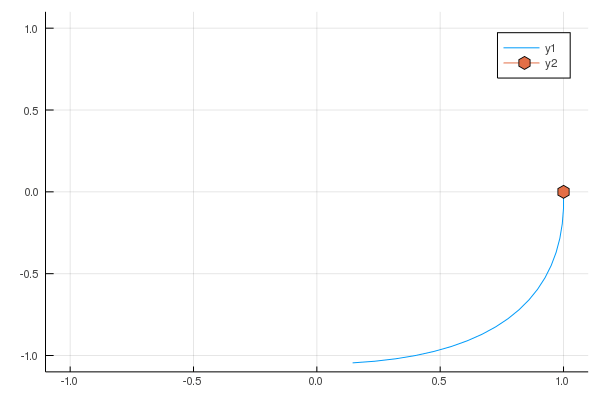

In [33]:
# The gif() function saves our animated plot to an animated gif
# Note: this may require you to have the `ffmpeg` program installed.
# On Ubuntu 16.04, you can get this with `sudo apt-get install ffmpeg`.
gif(anim, "mpc1.gif", fps = 30)

# Running the MPC controller

In [34]:
# run_mpc() takes the robot's current position and velocity
# and returns an optimized trajectory of position, velocity, 
# and acceleration. 
function run_mpc(initial_position, initial_velocity)
    
    model = Model(with_optimizer(Ipopt.Optimizer))

    Δt = 0.1
    num_time_steps = 10
    max_acceleration = 0.5

    @variables model begin
        position[1:2, 1:num_time_steps]
        velocity[1:2, 1:num_time_steps]
        -max_acceleration <= acceleration[1:2, 1:num_time_steps] <= max_acceleration
    end

    # Dynamics constraints
    @constraint(model, [i=2:num_time_steps, j=1:2],
                velocity[j, i] == velocity[j, i - 1] + acceleration[j, i - 1] * Δt)
    @constraint(model, [i=2:num_time_steps, j=1:2],
                position[j, i] == position[j, i - 1] + velocity[j, i - 1] * Δt)

    # Cost function: minimize final position and final velocity
    @objective(model, Min, 
        100 * sum(position[:, end].^2) + sum(velocity[:, end].^2))

    # Initial conditions:
    @constraint(model, position[:, 1] .== initial_position)
    @constraint(model, velocity[:, 1] .== initial_velocity)

    optimize!(model)
    return getvalue.(position), getvalue.(velocity), getvalue.(acceleration)
end


run_mpc (generic function with 1 method)

Repeatedly run the MPC program, applying its planned acceleration, and then simulate one step forward in time:

In [35]:
# The robot's starting position and velocity
p = [1.0, 0.0]
v = [0.0, -1.0]

2-element Array{Float64,1}:
  0.0
 -1.0

In [36]:
anim = @animate for i = 1:80
    print(i)
    # Plot the current position
    plot([p[1]], [p[2]], marker=(:hex, 10), xlim=(-1.1, 1.1), ylim=(-1.1, 1.1))
    
    # Run the MPC control optimization
    p_plan, v_plan, u_plan = run_mpc(p, v)
    
    # Draw the planned future states from the MPC optimization
    plot!(p_plan[1, :], p_plan[2, :], linewidth=5)
    
    # Apply the planned acceleration and simulate one step in time
    u = u_plan[:, 1]
    global v += u * Δt
    global p += v * Δt
end


1This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0

┌ Warning: `getvalue` is deprecated, use `JuMP.value` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:582 [inlined]
└ @ Core ./broadcast.jl:582
┌ Warning: `getvalue` is deprecated, use `JuMP.value` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:582 [inlined]
└ @ Core ./broadcast.jl:582
┌ Warning: `getvalue` is deprecated, use `JuMP.value` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:582 [inlined]
└ @ Core ./broadcast.jl:582


2This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0

5This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0

11This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

17This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

23This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

29This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

35This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

41This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

47This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

53This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

59This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

65This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

71This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

77This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:      112
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:        4

Total number of variables............................:       60
                     variables with only lower bounds:        0
                variables with lower and upper bounds:       20
                     variables with only upper bounds:        0
Total number of equality constraints.................:       40
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   

Animation("/tmp/tmpbqAPGG", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000071.png", "000072.png", "000073.png", "000074.png", "000075.png", "000076.png", "000077.png", "000078.png", "000079.png", "000080.png"])

┌ Info: Saved animation to 
│   fn = /home/philippew/mpc/src/mpc2.gif
└ @ Plots /home/philippew/.julia/packages/Plots/RsO3g/src/animation.jl:98


Plots.AnimatedGif("/home/philippew/mpc/src/mpc2.gif")
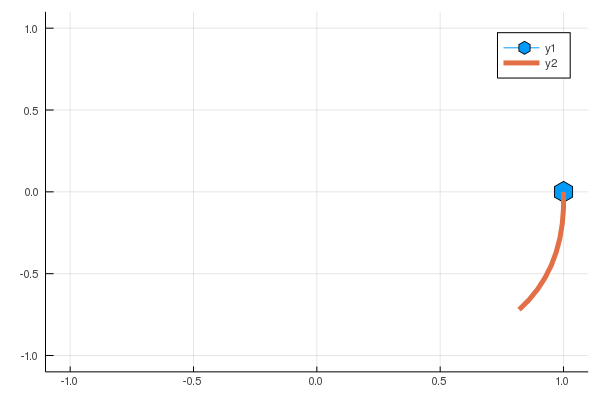

In [37]:
gif(anim, "mpc2.gif")